# BTVN: Phát hiện da người dựa trên lấy ngưỡng trên không gian màu

- Sử dụng không gian màu để phát hiện da trong bức ảnh
- có thể sử dụng các ngưỡng sau :
  - 0<=H<=17 and 15<=S<=170 and 0<=V<=255
  - 0<=Y<=255 and 135<=Cr<=180 and 85<=Cb<=135
  - 0<=Y<=255 and 150<=Cr<=200 and 100<=Cb<=150
- Có thể kết hợp các kết quả 2 không gian với nhau
- So sánh và nhận xét trên các tập dữ liệu trong folder skin
-Tài liệu tham khảo: 
     https://linkinghub.elsevier.com/retrieve/pii/S0262885620300573
     Shaik_ICRTC-2015: Comparative Study of Skin Color Detection and Segmentation in HSV and YCbCr Color Space

In [2]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt

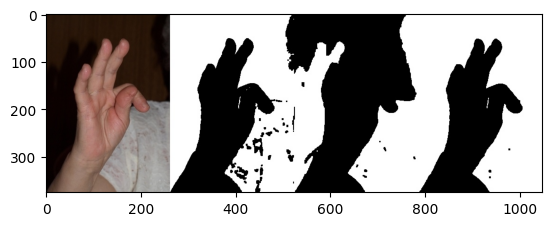

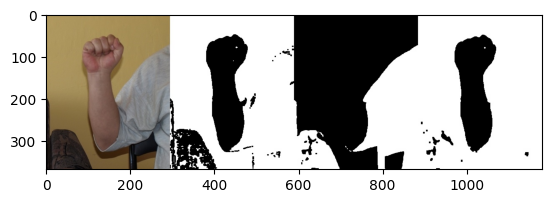

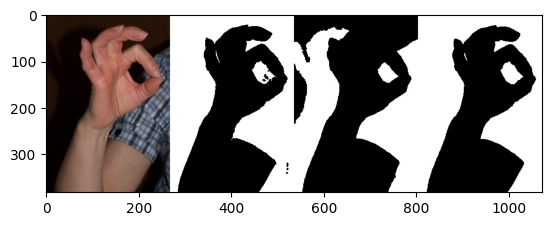

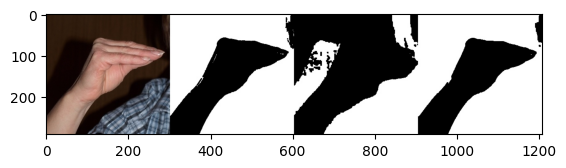

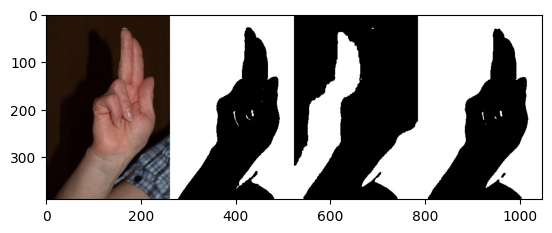

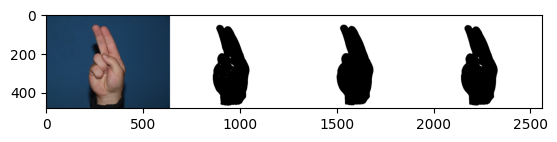

In [3]:
for folder in os.listdir('skin/HGR1/'):
    for file in os.listdir('skin/HGR1/'+folder):
        if file != "output.jpg":
            img=cv2.imread(os.path.join('skin/HGR1/'+folder,file))
            img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            #hsv color
            HSV_mask = cv2.inRange(img_HSV, (0, 15, 0), (17,170,255)) 
            HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

            #YCbCr color space
            img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
            #YCbCr color 
            YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135)) 
            YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

            
            global_mask=cv2.bitwise_and(YCrCb_mask,HSV_mask)
            global_mask=cv2.medianBlur(global_mask,3)
            global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))


            HSV_result = cv2.bitwise_not(HSV_mask)
            YCrCb_result = cv2.bitwise_not(YCrCb_mask)
            global_result=cv2.bitwise_not(global_mask)
            HSV_result=cv2.cvtColor(HSV_result,cv2.COLOR_GRAY2BGR)
            YCrCb_result=cv2.cvtColor(YCrCb_result,cv2.COLOR_GRAY2BGR)
            global_result=cv2.cvtColor(global_result,cv2.COLOR_GRAY2BGR)
            both = np.hstack((img,HSV_result,YCrCb_result,global_result))
            cv2.imwrite('skin/HGR1/'+folder+"/output.jpg",both)
            img=cv2.imread('skin/HGR1/'+folder+"/output.jpg")
            img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            plt.show()

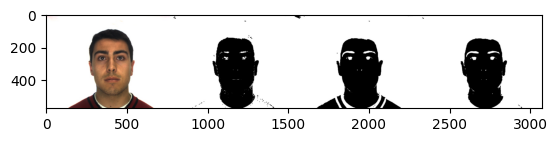

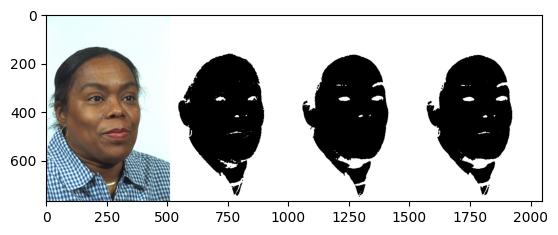

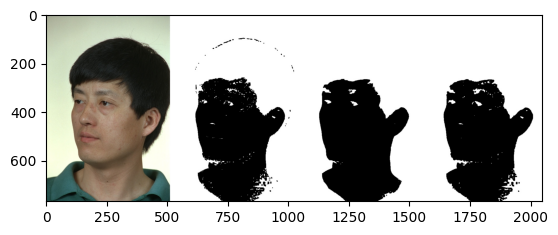

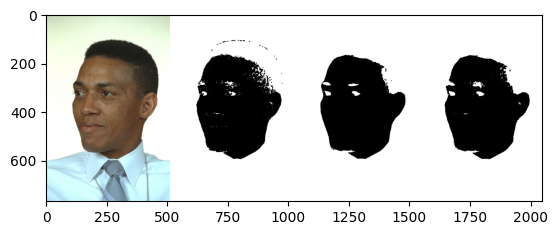

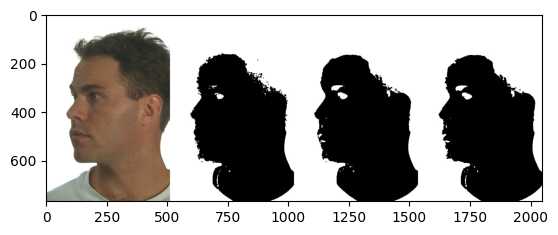

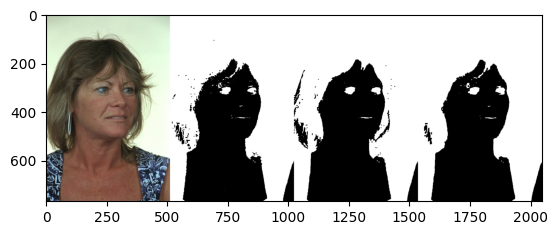

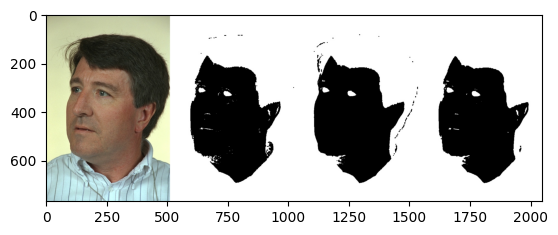

In [4]:
for folder in os.listdir('skin/SFA/'):
    for file in os.listdir('skin/SFA/'+folder):
        if file != "output.jpg":
            img=cv2.imread(os.path.join('skin/SFA/'+folder,file))
            img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            #hsv color
            HSV_mask = cv2.inRange(img_HSV, (0, 15, 0), (17,170,255)) 
            HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

            #YCbCr color space
            img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
            #YCbCr color 
            YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135)) 
            YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

            #tổng hợp 2 kết quả không gian màu
            global_mask=cv2.bitwise_and(YCrCb_mask,HSV_mask)
            global_mask=cv2.medianBlur(global_mask,3)
            global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))


            HSV_result = cv2.bitwise_not(HSV_mask)
            YCrCb_result = cv2.bitwise_not(YCrCb_mask)
            global_result=cv2.bitwise_not(global_mask)
            HSV_result=cv2.cvtColor(HSV_result,cv2.COLOR_GRAY2BGR)
            YCrCb_result=cv2.cvtColor(YCrCb_result,cv2.COLOR_GRAY2BGR)
            global_result=cv2.cvtColor(global_result,cv2.COLOR_GRAY2BGR)
            both = np.hstack((img,HSV_result,YCrCb_result,global_result))
            cv2.imwrite('skin/SFA/'+folder+"/output.jpg",both)
            img=cv2.imread('skin/SFA/'+folder+"/output.jpg")
            img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            plt.show()